In [1]:
import numpy as np
import cv2
import os
import matplotlib.pylab as plt

In [2]:
DATA_DIR = 'C:/Users/Nazanin/Desktop/tutorials/01/English Alphabet'

In [3]:
import os
os.listdir(DATA_DIR)

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [4]:
samples = []
label = []
for i in range(1, 27):
    for filename in os.listdir(f'English Alphabet/{i}'):
        img = cv2.imread(os.path.join(f'English Alphabet/{i}', filename))
        gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        # gray_img = gray_img.reshape(-1)
        samples.append(gray_img/255)
        label.append(i)

In [9]:
samples[0].shape

(60, 60)

In [15]:
import cv2
# Normalize the image
normalized_sample=[]
for k in samples:
   img_normalized = cv2.normalize(k, None, 0, 1.0,
   cv2.NORM_MINMAX, dtype=cv2.CV_32F)
   normalized_sample.append(k)
   

In [17]:
x = np.array(normalized_sample)
y = np.array(label).reshape(-1, 1)

In [18]:
randomize = np.arange(len(x))
np.random.shuffle(randomize)
x = x[randomize]
y = y[randomize]

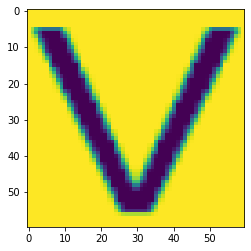

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(x[0].reshape(60, 60))

In [26]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(y)

In [27]:
train_labels_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [28]:
# # labels one hot
# y = np.zeros((520, 26))         

# for i in range(len(label)):
#     y[i, label[i]-1] = 1

In [30]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, train_labels_one_hot, test_size=0.2, random_state=42)

In [37]:
x_train.shape

(416, 60, 60)

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Conv2D,Flatten,MaxPooling2D
from tensorflow.keras import layers
# from keras.utils import to_categorical 

In [45]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(60,60,1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(26)
])

In [63]:
# Compile the model
model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['accuracy'])

In [64]:
# build the model
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
13/13 [==============================] - 2s 95ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2/20
13/13 [==============================] - 2s 120ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 3/20
13/13 [==============================] - 2s 109ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4/20
13/13 [==============================] - 2s 145ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 5/20
13/13 [==============================] - 1s 116ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 6/20
13/13 [==============================] - 2s 120ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 2s 152ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/20
13/13 [==============================] - 2s 141ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/20
13/13 [==============================] - 2s 114ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/20
13/13 [==============================] - 1s 110ms/step - loss: 0.0013 - accuracy: 1.0000


In [50]:
pred_train= model.predict(x_train)
scores = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(x_test)
scores2 = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

13/13 [==============================] - 0s 27ms/step
Accuracy on training data: 1.0% 
 Error on training data: 0.0
4/4 [==============================] - 0s 18ms/step
Accuracy on test data: 1.0% 
 Error on test data: 0.0


In [65]:
predictions = model.predict(x_test)

4/4 [==============================] - 0s 28ms/step


In [71]:
labels=['1', '2', '3', '4', '5', '6',
                '7', '8', '9', '10','11', '12', '13', '14', '15', '16',
                '17', '18', '19', '20','21', '22', '23', '24', '25', '26']

1/1 [==============================] - 0s 32ms/step
our model predicts that image 87 is 16


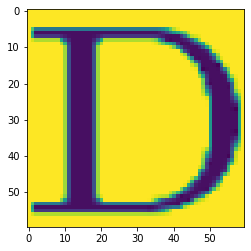

In [106]:
import random
idx = random.randint(0, len(x_test))
im = x_test[idx]
plt.imshow(im)

pred_t = np.argmax(model.predict(im.reshape(1, 60, 60, 1)))
print(f"our model predicts that image {idx} is {np.argmax(y_test[pred_t])}")

In [115]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

con = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

fig, ax = plt.subplots(figsize=(26, 26))
con = con.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

4/4 [==============================] - 0s 29ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets